<a href="https://colab.research.google.com/github/brocbroc/2P08_Data_Challenge/blob/main/Data_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [153]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [154]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [155]:
df = pd.read_csv("/content/drive/My Drive/2P08_notebooks/assets/team12_crime.csv")
print(df.shape)

(700, 9)


We use df.info() to check the data types, missing values, and to understand the dataset structure better.

In [156]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   incident_id     700 non-null    int64  
 1   date            700 non-null    object 
 2   neighborhood    700 non-null    object 
 3   crime_type      700 non-null    object 
 4   time_of_day     700 non-null    object 
 5   resolved        700 non-null    bool   
 6   property_value  662 non-null    float64
 7   arrests_made    700 non-null    int64  
 8   response_time   670 non-null    float64
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 44.6+ KB


We use df.head() to check if the dataset was loaded correctly, see the column names, and inspect the structure of the data.

In [157]:
df.head()

,incident_id,date,neighborhood,crime_type,time_of_day,resolved,property_value,arrests_made,response_time
0,1,2023-05-25,Commercial,Assault,Night,False,755.39,0,38.0
1,2,2023-04-19,Commercial,Theft,Afternoon,False,85.95,0,19.0
2,3,2023-01-21,Downtown,Vandalism,Afternoon,True,2579.09,0,13.0
3,4,2023-01-16,Commercial,Assault,Evening,True,1359.15,0,24.0
4,5,2023-11-04,Residential,Vandalism,Evening,True,968.88,0,9.0


Note that the columns property_value and response_time have missing data.

In [158]:
df.isnull().sum()

,0
incident_id,0
date,0
neighborhood,0
crime_type,0
time_of_day,0
resolved,0
property_value,38
arrests_made,0
response_time,30


We use df.describe() to see the range of the values and the measures of central tendency.

In [159]:
df.describe()

,incident_id,property_value,arrests_made,response_time
count,700.00000,662.000000,700.000000,670.000000
mean,350.50000,990.481148,0.408571,19.450746
std,202.21688,686.291481,0.559926,13.341097
min,1.00000,17.880000,0.000000,2.000000
25%,175.75000,473.017500,0.000000,9.000000
50%,350.50000,853.330000,0.000000,16.000000
75%,525.25000,1334.675000,1.000000,28.000000
max,700.00000,4794.430000,2.000000,60.000000


First, we fix column data types. The date column should be of type datetime and the neighborhod, crime_type, and time_of_day columns should be of type string

In [160]:
df = df.astype({'date': 'string', 'neighborhood': 'string', 'crime_type': 'string', 'time_of_day': 'string'})
df['date'] = pd.to_datetime(df['date'], format = '%Y-%m-%d')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   incident_id     700 non-null    int64         
 1   date            700 non-null    datetime64[ns]
 2   neighborhood    700 non-null    string        
 3   crime_type      700 non-null    string        
 4   time_of_day     700 non-null    string        
 5   resolved        700 non-null    bool          
 6   property_value  662 non-null    float64       
 7   arrests_made    700 non-null    int64         
 8   response_time   670 non-null    float64       
dtypes: bool(1), datetime64[ns](1), float64(2), int64(2), string(3)
memory usage: 44.6 KB


Now, we check for inconsistencies in the columns neighborhood, crime_type, and time_of_day.

In [161]:
pd.Series(df['neighborhood']).unique()

<StringArray>
['Commercial', 'Downtown', 'Residential', 'Industrial', 'Suburbs']
Length: 5, dtype: string

In [162]:
pd.Series(df['crime_type']).unique()

<StringArray>
['Assault', 'Theft', 'Vandalism', 'Burglary', 'Drug-related']
Length: 5, dtype: string

In [163]:
pd.Series(df['time_of_day']).unique()

<StringArray>
['Night', 'Afternoon', 'Evening', 'Morning']
Length: 4, dtype: string

No inconsistencies are observed in the columns. Now, we check for outliers in the data by plotting the frequency for each column.

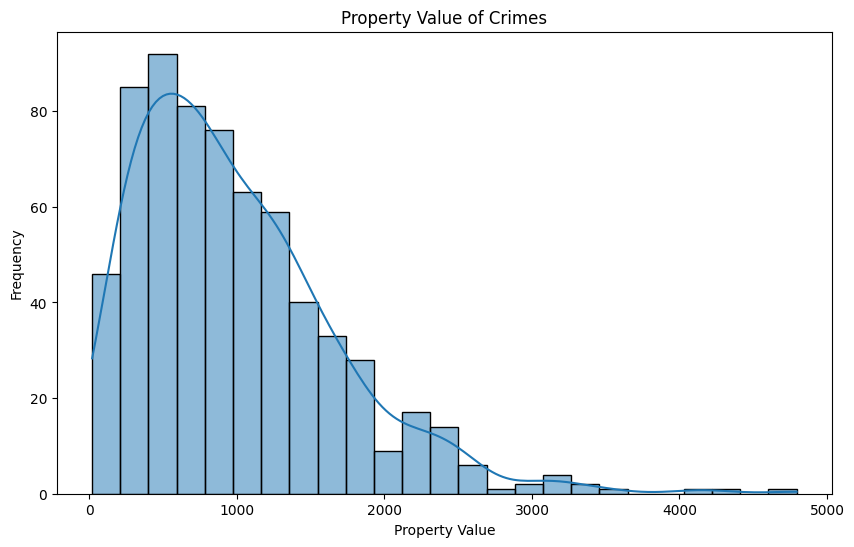

In [164]:
plt.figure(figsize=(10, 6))
sns.histplot(df['property_value'], kde=True)
plt.title('Property Value of Crimes')
plt.xlabel('Property Value')
plt.ylabel('Frequency')
plt.show()

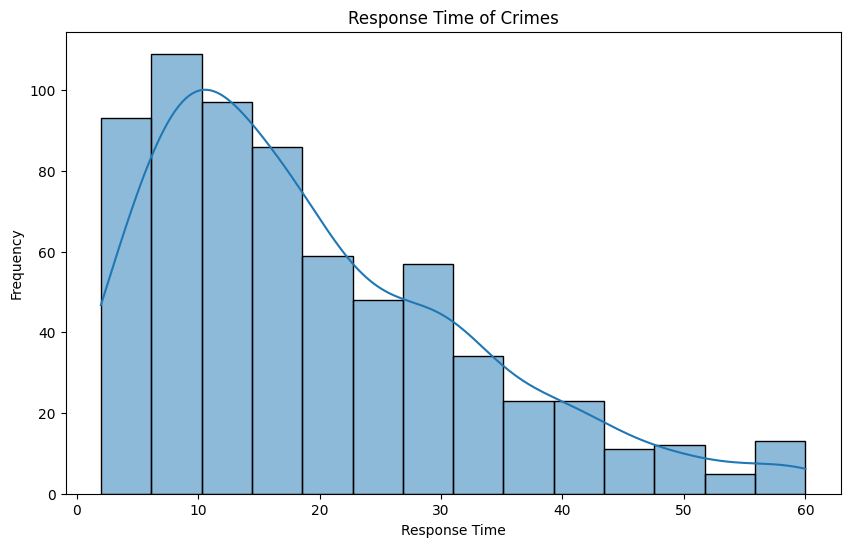

In [165]:
plt.figure(figsize=(10, 6))
sns.histplot(df['response_time'], kde=True)
plt.title('Response Time of Crimes')
plt.xlabel('Response Time')
plt.ylabel('Frequency')
plt.show()

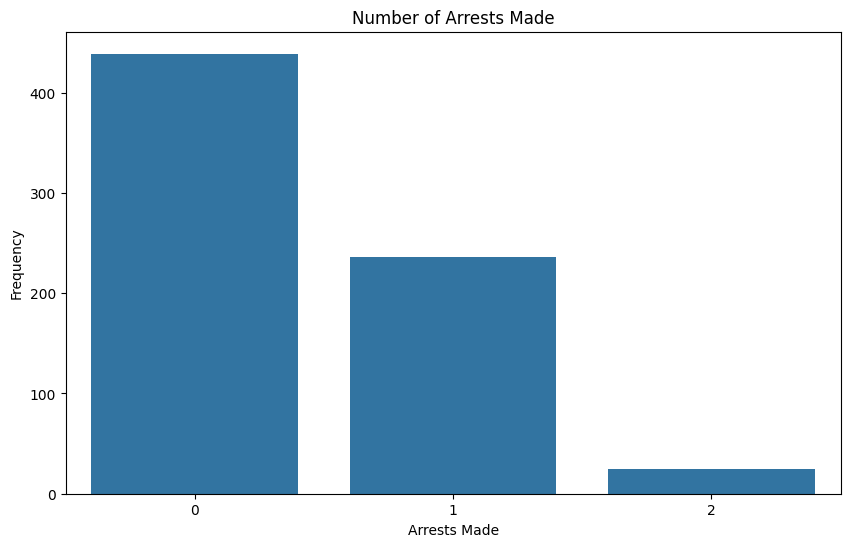

In [166]:
plt.figure(figsize=(10, 6))
sns.countplot(data = df, x = 'arrests_made')
plt.title('Number of Arrests Made')
plt.xlabel('Arrests Made')
plt.ylabel('Frequency')
plt.show()

From the plots, we observe that there do not appear to be any significant outliers in the property_value, response_time, or arrests_made columns that appear to be errors or faulty observations. Since the outliers represent natural variations in data, we retain them in the dataset.

We use df.describe() to inspect the data before handling null values.

In [167]:
df.describe()

,incident_id,date,property_value,arrests_made,response_time
count,700.00000,700,662.000000,700.000000,670.000000
mean,350.50000,2023-07-02 14:46:37.714285568,990.481148,0.408571,19.450746
min,1.00000,2023-01-01 00:00:00,17.880000,0.000000,2.000000
25%,175.75000,2023-04-02 00:00:00,473.017500,0.000000,9.000000
50%,350.50000,2023-06-29 12:00:00,853.330000,0.000000,16.000000
75%,525.25000,2023-10-04 06:00:00,1334.675000,1.000000,28.000000
max,700.00000,2023-12-31 00:00:00,4794.430000,2.000000,60.000000
std,202.21688,NaN,686.291481,0.559926,13.341097


Since our data set is fairly small, we elect to impute the missing data in the columns property_value and response_time so we can retain important information in the other columns. From the plots, it can be seen that both the property_value and the response_time are right-skewed. Since the data does not follow a normal distribution, we elect to fill the missing values with the median, because the mean can be skewed by outliers.

In [168]:
df['property_value'] = df['property_value'].fillna(df['property_value'].median())
df['response_time'] = df['response_time'].fillna(df['response_time'].median())
df.describe()

,incident_id,date,property_value,arrests_made,response_time
count,700.00000,700,700.000000,700.000000,700.000000
mean,350.50000,2023-07-02 14:46:37.714285568,983.035800,0.408571,19.302857
min,1.00000,2023-01-01 00:00:00,17.880000,0.000000,2.000000
25%,175.75000,2023-04-02 00:00:00,505.887500,0.000000,9.000000
50%,350.50000,2023-06-29 12:00:00,853.330000,0.000000,16.000000
75%,525.25000,2023-10-04 06:00:00,1321.507500,1.000000,27.000000
max,700.00000,2023-12-31 00:00:00,4794.430000,2.000000,60.000000
std,202.21688,NaN,668.100404,0.559926,13.070393


Filling the missing data with the median value reduced the variance by 5.23% in the property value column and by 4.02% in the response time column. As such, the loss of variance is considered acceptable.

Question 1: Which neighborhood has the highest crime rate?

Count number of incidents per neighborhood, identify the neighborhood with the highest count using idxmax(), create a bar chart visualization to see the pattern of which neighborhood has the highest crime.

In [169]:
crime_counts=df.groupby('neighborhood').size()
highest=crime_counts.idxmax()

print("Neighborhood with highest crime rate:", highest)
print("Number of incidents:", crime_counts.max())

Neighborhood with highest crime rate: Commercial
Number of incidents: 149


The visualization of the neighborhood with the highest crime rate

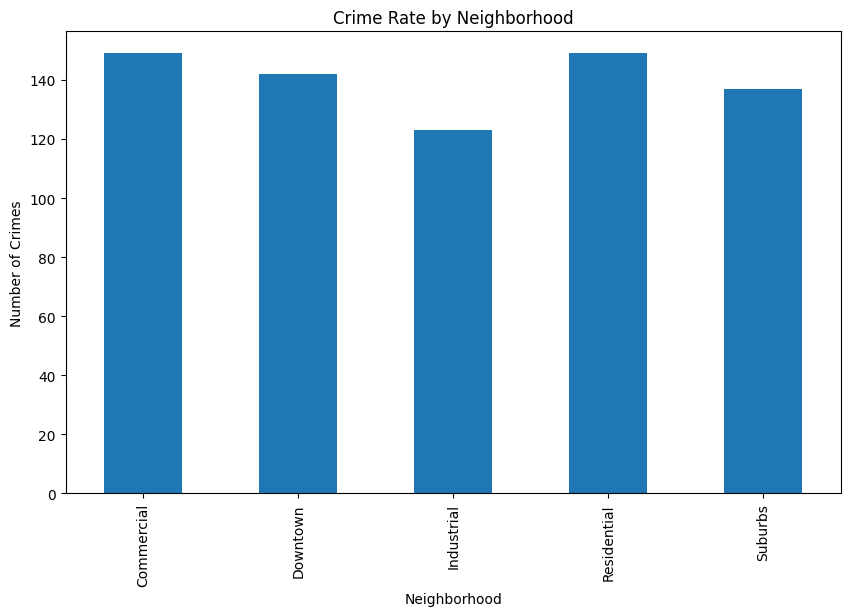

In [170]:
plt.figure(figsize=(10, 6))
crime_counts.plot.bar(x = 'neighborhood')
plt.title("Crime Rate by Neighborhood")
plt.xlabel("Neighborhood")
plt.ylabel("Number of Crimes")
plt.show()

In the graph, we can see that the crime incidents is more concentrated in commercial and residential neighborhoods,suggesting that areas with higher population density and business activity experience more crime while industrial areas experience the least crime incidents maybe due to lower resenditial population and restricted access.

Question 2: What is the average response time by crime types?

We have to convert the reponse time into numeric but since we cleaned the dataset, it might be unnecessary, group by the crime time, find the mean response time and sort in descending order.

In [171]:
avg_response= df.groupby('crime_type')['response_time'].mean()
highest_crime= avg_response.idxmax()

print("crime type with the highest average response time:", highest_crime)
print("average response time:",avg_response)

crime type with the highest average response time: Vandalism
average response time: crime_type
Assault         19.503704
Burglary        18.510949
Drug-related    18.970149
Theft           19.376518
Vandalism       20.052632
Name: response_time, dtype: float64


Question 3: Which time of the day has the most incidents?

Count incidents by the time of day, identify the highest count using idmax(), and create a bar chart visualization to see the pattern of which time of day had the most incidents.

In [172]:
time_counts= df.groupby('time_of_day').size()
highest_time= time_counts.idxmax()

print("Time with most incidents:", highest_time)
print("Number of incidents", time_counts.max())

Time with most incidents: Night
Number of incidents 211


Visualization of which time of the day has the most incidents

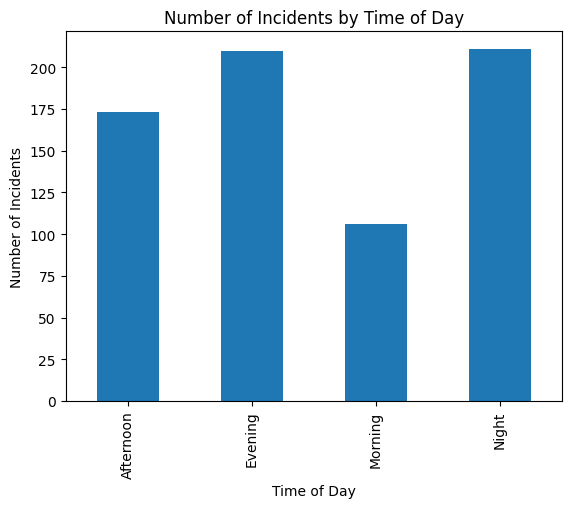

In [173]:
time_counts.plot(kind='bar')
plt.title("Number of Incidents by Time of Day")
plt.xlabel("Time of Day")
plt.ylabel("Number of Incidents")
plt.show()

In the graph, we can see that the crime incidents are the highest during Night and Evening hours, indicating that the criminal activity increases during later parts of the day. Morning shows the lowest number of incidents, suggesting crime is less frequent during early hours.

Question 4: What percentage of crimes are resolved in each neighborhood?

We group the data by neighbour hood and then, for each neighbourhood, compute the number of resolved crimes over the total number of crime.

In [174]:
is_resolved = df['resolved'] == True
resolved = df[is_resolved]
num_resolved = resolved['neighborhood'].value_counts()
resolved_ratio = num_resolved.astype(float) / df['neighborhood'].value_counts()
resolved_ratio.map('{:.2%}'.format)

,count
neighborhood,
Commercial,44.97%
Downtown,58.45%
Industrial,55.28%
Residential,55.70%
Suburbs,54.01%


It can be seen that the commercial area has the lowest percentage of resolved crimes. One possible reason is due to the prevalence of shoplifting in commercial areas, which is a crime that frequently goes uninvestigated and unresolved. Additionally, the downtown area seems to have the highest percentage of resolved crimes. This could be due to higher police presence in downtown areas.

Question 5: How does property value vary by crime type?

We group the data by crime type, and then compute summary statistics for the property value.

In [175]:
df.groupby('crime_type')['property_value'].describe()

,count,mean,std,min,25%,50%,75%,max
crime_type,,,,,,,,
Assault,135.0,1061.124148,750.541650,45.37,537.880,853.330,1402.7350,4068.63
Burglary,137.0,988.386934,660.734930,69.62,472.940,846.200,1368.6200,3129.77
Drug-related,67.0,923.396269,613.934908,17.88,484.005,836.960,1297.7150,3098.64
Theft,247.0,962.990769,689.711805,58.26,482.780,853.330,1246.4750,4794.43
Vandalism,114.0,962.614211,548.814974,75.35,535.955,898.945,1287.0325,2579.09


From the summary statistics, we can see that assault is the most expensive crime, on average, and that drug-related crimes are the least expensive, on average. Furthermore, assault has the highest standard deviation though theft has the largest range of values. This is possibly due to theft having many more observations than assault, leading to an increased likelihood of seeing an extreme observation

Visualization: Property value by crime type

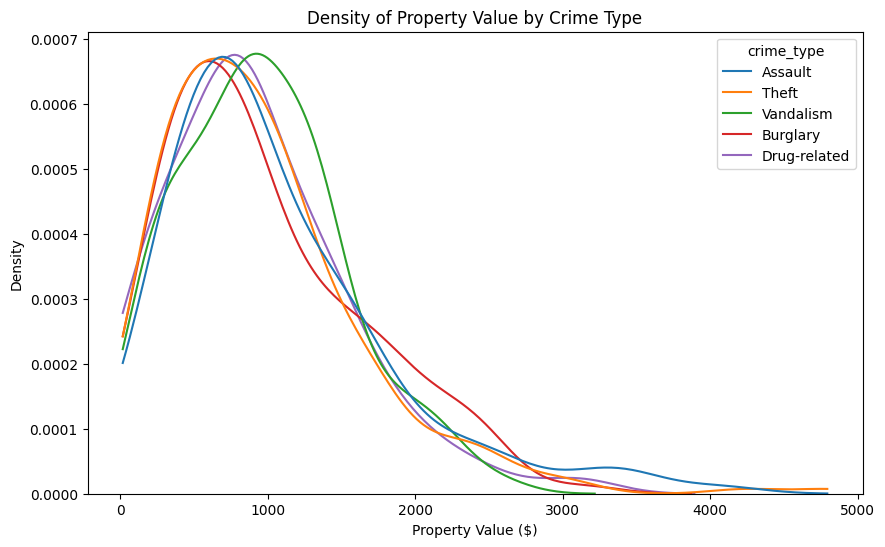

In [176]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data = df, x = 'property_value', hue = 'crime_type', common_norm = False, clip = (df['property_value'].min(), df['property_value'].max()))
plt.title('Density of Property Value by Crime Type')
plt.xlabel('Property Value ($)')
plt.show()

This shows that the property value for every crime type is right-skewed, with the majority of crime costing less than \\$2000. Furthermore, the density of property values peaks at under \\$1000 for all crime types. Despite vandalism having the highest property value at its peak, it appears to decline sharply after that, giving it the smallest range and lowest standard deviation.

Question 6: Which crime type results in the most arrests?

We group by crime types and then find the one with the most arrests.

In [177]:
arrests_count = df.groupby('crime_type')['arrests_made'].sum()
mask = arrests_count == arrests_count.max()
arrests_count.index[mask].tolist()

['Theft']

Visualization: Number of arrests by crime type

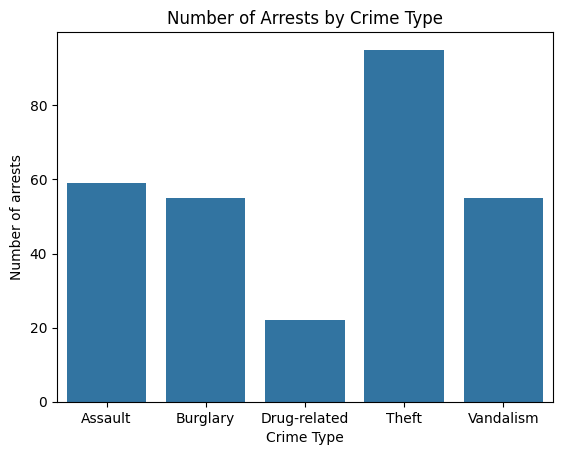

In [178]:
data6 = df.groupby('crime_type')['arrests_made'].sum().reset_index()
sns.barplot(data = data6, x = 'crime_type', y = 'arrests_made')
plt.title('Number of Arrests by Crime Type')
plt.xlabel('Crime Type')
plt.ylabel('Number of arrests')
plt.show()

From the graph, it can be seen that theft has by far the most number of arrests. This is due to theft being the most common crime by far. Similarly, drug-related crimes have the lowest number of arrests and they are also the least common crime.